# GENOPYC TUTORIAL NOTEBOOK


In this tutorial we will explore some of the features of genopyc library

# Install the library 

In [1]:
!pip install genopyc

# Import all the necessary libraries

In [1]:
import genopyc as gp
import matplotlib.pyplot as plt
import seaborn as sns


# Download variants associated to intervertebral disc degeneration (EFO_0000305) from GWAS catalog

In [2]:
associations=gp.get_associations('EFO_0004994',verbose=True)
associations.head()

querying associations... 

building the dataframe...


,variantid,p-value,risk_allele,RAF,beta,CI,mapped_gene,SE,study
0,rs17034687,2.0e-09,C,0.09,0.23,[0.16-0.30],intergenic,0.038,https://www.ebi.ac.uk/gwas/rest/api/associatio...
1,rs2187689,3.0e-08,C,0.08,0.23,[0.15-0.31],PSMB9,0.041,https://www.ebi.ac.uk/gwas/rest/api/associatio...
2,rs926849,3.0e-08,C,0.31,0.13,[0.083-0.177],PARK2,0.024,https://www.ebi.ac.uk/gwas/rest/api/associatio...
3,rs7744666,6.0e-08,C,0.10,0.20,[0.13-0.27],intergenic,0.037,https://www.ebi.ac.uk/gwas/rest/api/associatio...
4,rs11969002,6.0e-08,A,0.10,0.20,[0.13-0.27],intergenic,0.037,https://www.ebi.ac.uk/gwas/rest/api/associatio...


## Get Variant Positions for all the variants retrieved

The function get_variant_position accept a list of rsids or a single rsid and returns a list of tuples with shape (variantid, chomosome, genomic coordinates). If the input size is bigger than 200 variants the functions automatically divide it into chunks of 200 elements and process them separately.

In [3]:
variants=list(set(associations.variantid.tolist()))
variant_positions=gp.get_variant_position(variants)
variant_positions[:10]

[('rs4875102', '8', 4427170),
 ('rs7163797', '15', 67072574),
 ('rs2187689', '6', 32884870),
 ('rs4802666', '19', 50217817),
 ('rs6936004', '6', 32889157),
 ('rs1029296', '6', 32888604),
 ('rs11969002', '6', 32891971),
 ('rs10214886', '6', 32889642),
 ('rs10998466', '10', 68866673),
 ('rs2484990', '10', 31226203)]

 - A first approach could be to investigate the elements that lie in a specific region surrounding variant of interest, this can be easily done with get_ov_elements() function. It accepts genomic coordinates chromosome, start and end of a specific genomic region and it returns the elements that overlap it. The feature keyword is a list containing the specific features we want to retrieve. Refer to the [Documentation](https://rest.ensembl.org/documentation/info/overlap_region) from ensembl in order to have a full list of possible features that can be retrieved.
 
- Here I will inspect a region of 500 bp arount the rsid rs2901157 retrieving genes and motif features of that genomic area

- The function get_ov_region has a mode SNP in which a snp can be fed directly or alternatively a genomic area (chromosome, start, stop) can be passed

In [5]:
overlapping_elements = gp.get_ov_region('rs1981483',features=['regulatory','gene','motif'],mode='SNP')
overlapping_elements[2]

,binding_matrix_stable_id,end,feature_type,score,seq_region_name,stable_id,start,strand,transcription_factor_complex
0,ENSPFM0379,580417,motif,-30.041990,16,ENSM00558876741,580404,-1,"MEIS2,MEIS3,TGIF2,TGIF2LX,PKNOX1,PKNOX2,TGIF1"
1,ENSPFM0377,580421,motif,2.915861,16,ENSM00617289486,580405,1,MEIS1::SOX2
2,ENSPFM0289,580425,motif,-6.953043,16,ENSM00593297911,580411,-1,HNF4A
3,ENSPFM0322,580430,motif,0.206662,16,ENSM00646058943,580417,1,HOXB2::PITX1
4,ENSPFM0416,580427,motif,5.749359,16,ENSM00576268614,580418,-1,"NKX3-2,NKX2-3,NKX2-8,NKX3-1"
...,...,...,...,...,...,...,...,...,...
268,ENSPFM0233,580600,motif,6.370897,16,ENSM00621738886,580587,-1,GCM1::FOXI1
269,ENSPFM0436,580599,motif,3.616267,16,ENSM00417533345,580590,-1,"PBX4::HOXA10,PBX4::HOXA1"
270,ENSPFM0431,580599,motif,-1.702089,16,ENSM00415069205,580590,-1,"PAX7,PAX3"
271,ENSPFM0293,580600,motif,0.892623,16,ENSM00580901800,580591,-1,"HOXC10,HOXA13,HOXB13,HOXC13,HOXD13"


- The result is a list of dataframes (for every feature type we looked for) we can filter the results. For example we can retrieve all the motifs of TFBS in the area. You can learn more about [motifs](https://www.ensembl.info/2018/10/15/new-ensembl-motif-features/) and [regulatory features](https://www.ensembl.org/info/genome/funcgen/index.html) in the official Ensembl documentation.



# Run VEP to investigate variant consequences and plot the results

With the function gp.VEP we can programmatically run VEP to investigate SNP consequences

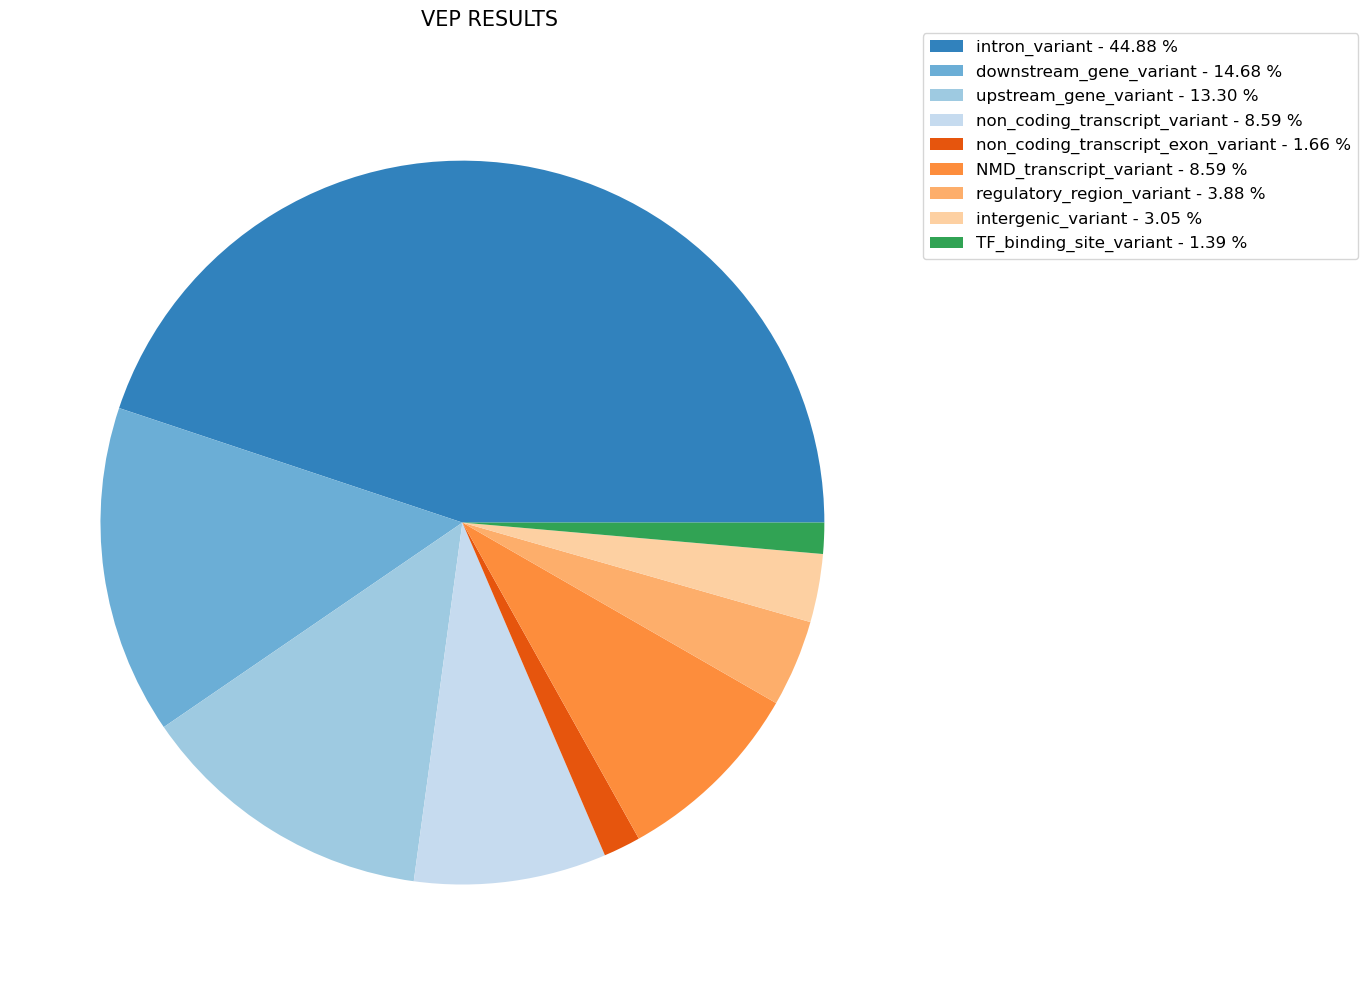

In [6]:
vep_consequences=gp.VEP(variants,plot=True)

## The output is a list of dataframes for every type of result: transcript, regulatory, motifs and intergenic variants. Here the second dataframe in the list stores all the transcript effects

In [7]:
transcript_variants = vep_consequences[1]
transcript_variants

,variantid,effects,biotype,ENSID
0,rs4875102,['intron_variant'],protein_coding,ENSG00000183117
1,rs2484992,"['intron_variant', 'non_coding_transcript_vari...",lncRNA,ENSG00000272381
2,rs1981483,['intron_variant'],protein_coding,ENSG00000007541
3,rs7907616,['intron_variant'],protein_coding,ENSG00000122863
4,rs11969002,['upstream_gene_variant'],lncRNA,ENSG00000289047
...,...,...,...,...
60,rs9469300,['upstream_gene_variant'],unprocessed_pseudogene,ENSG00000235301
61,rs7896691,['downstream_gene_variant'],protein_coding,ENSG00000067057
62,rs7744666,['upstream_gene_variant'],lncRNA,ENSG00000289047
63,rs2017567,['downstream_gene_variant'],protein_coding,ENSG00000007541


## It would be interesting to select the variants that have been detected to affect a protein coding gene and inspect the haplotype by retrieving all the variants in LD above a certain threshold e.g. 0.8. 

## This can be done with gp.get_variants_in_LD function. It accepts and rsid as argument and the LD value and returns a list of SNPs that are in LD with it


In [8]:
protein_coding_variants = transcript_variants[transcript_variants.biotype == 'protein_coding'].variantid.tolist()
protein_coding_variants

['rs4875102',
 'rs1981483',
 'rs7907616',
 'rs926849',
 'rs980238',
 'rs4148933',
 'rs10998466',
 'rs7163797',
 'rs7896691',
 'rs9301951',
 'rs4284332',
 'rs7204439',
 'rs1154053',
 'rs11754641',
 'rs2017567',
 'rs7896691',
 'rs11918654',
 'rs4802666',
 'rs1981483',
 'rs1245582',
 'rs7896691',
 'rs2017567']

## retrieve variants in LD above 0.8 for every variant in severe_rsids and save the results in a dictionary where the keys are the starting rsids and the value all the variants in LD

In [9]:
ld_variants={rsid:gp.get_variants_in_LD(rsid,0.8) for rsid in protein_coding_variants }

Here we will print all the variant retrieved to be in LD with  rs7896691

In [10]:
ld_variants['rs7896691'][:20]

['rs6602024',
 'rs6602023',
 'rs77187733',
 'rs7917172',
 'rs117781684',
 'rs7907949',
 'rs17132175',
 'rs112196862',
 'rs7903389',
 'rs56221890',
 'rs4881085',
 'rs7906901']

# Running VEP running HGVS notation

So far we have worked with rsids, however a single rsid can correspond to more than one substitution. From GWAS catalog however we have the precise information of the risk allele and we should use this information. For doing this we will need to write variants in HGVS format since a single rsid can correspond to more than one substitution.

An example of HGVS notation is 9:g.22125504G>C where:

- 9 is the chromosome
- g means genome position
- 22125504 is the chromosome position
- G and C  are the ref and alternative allele

The information regarding ancestrarl allele is still missing; a drawback of using rsids as variants is that for a single rsid we can have more than one nucleotide substitution. The strategy here is to keep the ancestral allele that is most represented. This can be easily done with the function gp.get_ancestral_allele() that accept a list of rsids as argument

In [11]:
variant_risk_alleles=dict(zip(associations.variantid.tolist(),[ra for ra in associations.risk_allele.tolist()]))
variant_genomic_locations=dict(zip([tup[0] for tup in variant_positions],[tup[2] for tup in variant_positions]))
variant_chromosomes=dict(zip([tup[0] for tup in variant_positions],[tup[1] for tup in variant_positions]))
variant_ancestral_allele = gp.get_ancestral_allele(variants)

## Now we will merge all the information retrieved and we will convert the variant in HGVS notation

In [12]:
hgvs_idlist=[]

for variant in associations.variantid.tolist():
    
    try:
        hgvs_notation=str(variant_chromosomes[variant])+':g.'+str(variant_genomic_locations[variant])+str(variant_ancestral_allele[variant])+'>'+str(variant_risk_alleles[variant])
        hgvs_idlist.append(hgvs_notation)
    except Exception as error:
        print(f'Error for rsid {variant}: ' + repr(error))
hgvs_idlist

['3:g.3638168C>C',
 '6:g.32884870T>C',
 '6:g.161740587T>C',
 '6:g.32891935T>C',
 '6:g.32891971G>A',
 '6:g.32887940G>A',
 '6:g.32888604T>C',
 '6:g.32889157T>C',
 '6:g.32894830T>A',
 '6:g.32892975G>A',
 '6:g.32889642T>A',
 '6:g.32886920G>A',
 '8:g.4427170A>A',
 '6:g.32888705T>C',
 '13:g.94300578T>C',
 '10:g.3112981T>C',
 '10:g.68866673A>A',
 '16:g.580665A>A',
 '8:g.4427868C>C',
 '10:g.31226203T>C',
 '10:g.31207045G>A',
 '16:g.611335C>C',
 '19:g.50217817G>A',
 '10:g.31223169T>C',
 '6:g.113695931A>A',
 '6:g.11943293G>G',
 '3:g.5146561C>C',
 '8:g.91547687A>A',
 '6:g.64926030C>C',
 '8:g.4425096A>A',
 '11:g.103655296C>C',
 '11:g.103659638G>G',
 '11:g.103655026A>A',
 '16:g.587212C>C',
 '11:g.103658904A>A',
 '10:g.72018509T>?',
 '10:g.72018509T>?',
 '10:g.72000418G>?',
 '10:g.72000132C>?',
 '10:g.71974194C>?',
 '15:g.67072574A>?']

## Run [VEP](https://www.ensembl.org/Tools/VEP) from command line

We can specify that we are using hgvs notation by by passing the argument input_type='hgvs'

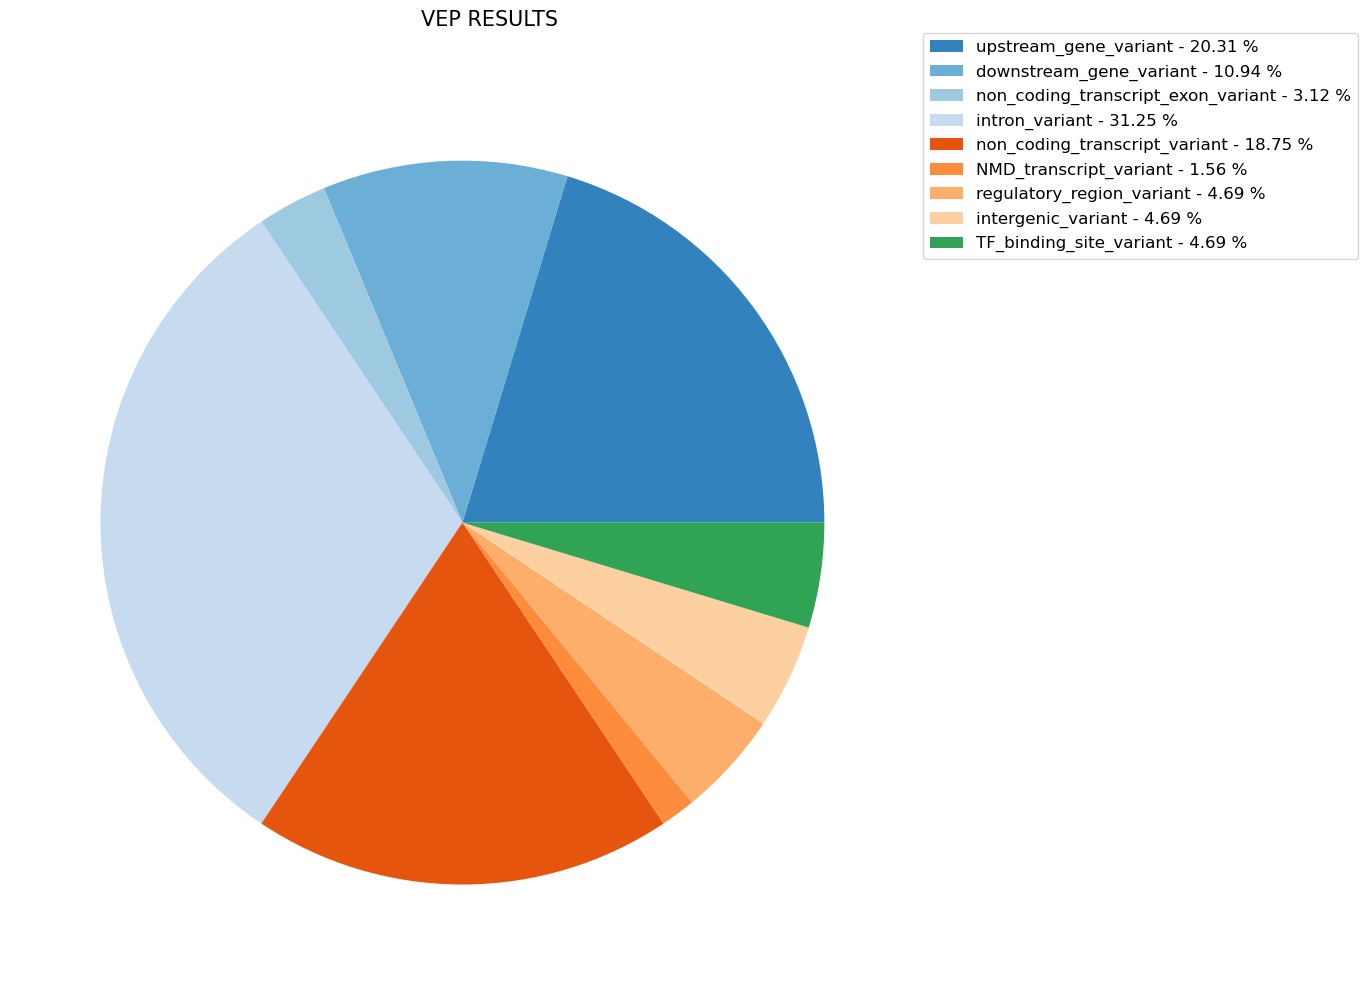

In [13]:
vep_consequences_hgvs=gp.VEP(hgvs_idlist,plot=True,input_type='hgvs')

The result is a list containing 4 dataframe as in VEP functions. VEP separates the effects in transcript effects, regulatory effects, non coding effects and regulatory motif effects. 

In [14]:
vep_consequences_hgvs[1]

,variantid,effects,biotype,ENSID
0,10:g.31207045G>A,"['intron_variant', 'non_coding_transcript_vari...",lncRNA,ENSG00000237036
1,6:g.32888604T>C,['downstream_gene_variant'],lncRNA,ENSG00000289559
2,6:g.32891935T>C,['upstream_gene_variant'],lncRNA,ENSG00000289047
3,6:g.32892975G>A,['upstream_gene_variant'],unprocessed_pseudogene,ENSG00000235301
4,19:g.50217817G>A,['intron_variant'],protein_coding,ENSG00000105357
5,10:g.31226203T>C,"['intron_variant', 'non_coding_transcript_vari...",lncRNA,ENSG00000272381
6,6:g.32894830T>A,['upstream_gene_variant'],lncRNA,ENSG00000289559
7,6:g.32894830T>A,['upstream_gene_variant'],unprocessed_pseudogene,ENSG00000235301
8,10:g.31223169T>C,"['intron_variant', 'non_coding_transcript_vari...",lncRNA,ENSG00000237036
9,6:g.32889157T>C,['downstream_gene_variant'],lncRNA,ENSG00000289559


The majority of the variants falls in intronic regions so is not clear which would be the effect on transcripts. Expecially for complex traits such as breast cancer, it would be interesting to inspect the effect of regulatory variant on specific neighbouring genes. In fact, most likely, the variants will have affect the transcription of genes, affecting trnscription factor binding sites, enhanchers or CTCF. 

<b> One possible approach could be to investigate the mapped genes and see what are the pathways that could be affected by these variants

# Find the positions of the genes mapped to specific variants


In [15]:
mapped_genes=associations.mapped_gene.tolist()
mapped_genes=[gene for gene in mapped_genes if (gene !="intergenic") & (gene != '')]
list(set(mapped_genes))

['CHST3', 'RAB40C', 'GPC6', 'PIGQ', 'PSMB9', 'ARL8B', 'MYH14', 'PARK2', 'PFKP']

## Map Gene Symbol to Ensemble ID

For this task we will use another library named <b>[biomapy](https://pypi.org/project/biomapy/)

In [16]:
!pip install biomapy

In [17]:
import biomapy as bp

mapped_genes_ens=bp.gene_mapping_many(mapped_genes,'symbol','ensembl')
mapped_genes_ens = list(filter(None,mapped_genes_ens))
mapped_genes_ens[:10]

['ENSG00000240065',
 'ENSG00000183098',
 'ENSG00000067057',
 'ENSG00000007541',
 'ENSG00000197562',
 'ENSG00000105357',
 'ENSG00000134108',
 'ENSG00000122863',
 'ENSG00000122863']

## Retrieve the position of all the genes

In [18]:
gene_positions=gp.get_gene_position(mapped_genes_ens)
gene_positions[:10]

[('ENSG00000007541', 16, 566995, 584109),
 ('ENSG00000240065', 6, 32844136, 32859851),
 ('ENSG00000067057', 10, 3066333, 3137718),
 ('ENSG00000122863', 10, 71964395, 72013558),
 ('ENSG00000197562', 16, 589357, 629272),
 ('ENSG00000183098', 13, 93226807, 94408020),
 ('ENSG00000134108', 3, 5122249, 5180911),
 ('ENSG00000105357', 19, 50188186, 50310542)]

# Lift Coordinates

Genopyc give the possibility to lift coordinates, this can be useful for a small amount of data. For bigger queries refer to [ensembl](https://www.ensembl.org/Homo_sapiens/Tools/AssemblyConverter) or [UCSC](https://genome.ucsc.edu/cgi-bin/hgLiftOver) dedicated tools.

In [19]:
g37_gene_positions=[(gene,gp.grch_liftover(chromosome,start,end,source='GRCh38',target='GRCh37')) for (gene,chromosome,start,end) in gene_positions]

g37_gene_positions[:10]

[('ENSG00000007541', (16, 616995, 634109)),
 ('ENSG00000240065', (6, 32811913, 32827628)),
 ('ENSG00000067057', (10, 3108525, 3179910)),
 ('ENSG00000122863', (10, 73724153, 73773316)),
 ('ENSG00000197562', (16, 639357, 679272)),
 ('ENSG00000183098', (13, 93879060, 94638326)),
 ('ENSG00000134108', (3, 5163934, 5222596)),
 ('ENSG00000105357', (19, 50691443, 50813799))]

One Interesting approach could be to investigate expression quantitative trait loci (eqtls) for a given variant. 
These studies correlate genetic variations with the altered expression of a gene, more likely the variation have an effect on the expression of that specific candidate.

# Eqtls

Genopyc allows you to retrieve all the eqtls of a given variant the code. Data are fetched from [EBI](https://www.ebi.ac.uk/eqtl/). [Documentation](https://www.ebi.ac.uk/eqtl/api-docs/#accessing-the-api) available. Here we will get the eqtls for the first 5 variants

In [5]:
eqtls_dict={rsid:gp.get_eqtl_df(rsid) for rsid in variants[:5]}

In [6]:
eqtls_dict[list(eqtls_dict.keys())[0]]

,variantid,p_value,log_pval,beta,alt,gene_id,tissue,study_id,tissue_name
0,rs1250307,0.002947,2.530561,0.290986,A,ENSG00000259994,UBERON_0002190,GTEx_V8,subcutaneous adipose tissue
1,rs1250307,0.000012,4.916032,-0.301025,A,ENSG00000237036,UBERON_0002190,GTEx_V8,subcutaneous adipose tissue
2,rs1250307,0.002904,2.536936,-0.206541,A,ENSG00000237036,UBERON_0010414,GTEx_V8,omental fat pad
3,rs1250307,0.002027,2.693219,-0.398078,A,ENSG00000234335,UBERON_0010414,GTEx_V8,omental fat pad
4,rs1250307,0.000489,3.310604,-0.489668,A,ENSG00000237036,UBERON_0002369,GTEx_V8,adrenal gland
5,rs1250307,0.004523,2.344565,-0.217356,A,ENSG00000237036,UBERON_0001496,GTEx_V8,ascending aorta
6,rs1250307,0.000713,3.146861,-0.239375,A,ENSG00000237036,UBERON_0007610,GTEx_V8,tibial artery
7,rs1250307,0.000308,3.510828,-0.700987,A,ENSG00000237036,UBERON_0009834,GTEx_V8,dorsolateral prefrontal cortex
8,rs1250307,0.000831,3.080527,-0.306575,A,ENSG00000237036,UBERON_0001159,GTEx_V8,sigmoid colon
9,rs1250307,0.000097,4.014913,-0.359027,A,ENSG00000237036,UBERON_0004550,GTEx_V8,gastroesophageal sphincter


# Overlapping Elements

Genopyc allows the user to retrieve the elements in a genomic area (band, gene, transcript, cds, exon, repeat, simple, misc, variation, somatic_variation, structural_variation, somatic_structural_variation, constrained, regulatory, motif, other_regulatory, array_probe, mane) 

In [22]:
genes_in_the_region = gp.get_ov_region(chr=4,start=140424943,stop=140624564,features=['gene'])
genes_in_the_region[0]

,assembly_name,biotype,canonical_transcript,description,end,external_name,feature_type,gene_id,id,logic_name,seq_region_name,source,start,strand,version
0,GRCh38,protein_coding,ENST00000325617.10,calmegin [Source:HGNC Symbol;Acc:HGNC:2060],140427661,CLGN,gene,ENSG00000153132,ENSG00000153132,ensembl_havana_gene_homo_sapiens,4,ensembl_havana,140388453,-1,13.0
1,GRCh38,protein_coding,ENST00000511113.6,MGAT4 family member D [Source:HGNC Symbol;Acc:...,140498377,MGAT4D,gene,ENSG00000205301,ENSG00000205301,ensembl_havana_gene_homo_sapiens,4,ensembl_havana,140442262,-1,12.0
2,GRCh38,TEC,ENST00000624981.1,tec,140501330,gene,ENSG00000280262,ENSG00000280262,havana_homo_sapiens,4,havana,140498402,1,1,NaN
3,GRCh38,protein_coding,ENST00000323570.8,ELMO domain containing 2 [Source:HGNC Symbol;A...,140553770,ELMOD2,gene,ENSG00000179387,ENSG00000179387,ensembl_havana_gene_homo_sapiens,4,ensembl_havana,140524168,1,10.0
4,GRCh38,protein_coding,ENST00000262999.4,uncoupling protein 1 [Source:HGNC Symbol;Acc:H...,140568961,UCP1,gene,ENSG00000109424,ENSG00000109424,ensembl_havana_gene_homo_sapiens,4,ensembl_havana,140559431,-1,4.0
5,GRCh38,lncRNA,ENST00000669079.1,novel transcript,140579657,gene,ENSG00000287449,ENSG00000287449,havana_tagene_homo_sapiens,4,havana_tagene,140577845,1,1,NaN
6,GRCh38,misc_RNA,ENST00000484176.3,"RNA, 7SL, cytoplasmic 152, pseudogene [Source:...",140578222,RN7SL152P,gene,ENSG00000242102,ENSG00000242102,ncrna_homo_sapiens,4,ensembl,140577925,1,3.0
7,GRCh38,processed_pseudogene,ENST00000512540.2,riboflavin kinase (RFK) pseudogene,140600575,gene,ENSG00000248621,ENSG00000248621,havana_homo_sapiens,4,havana,140600401,-1,2,NaN
8,GRCh38,protein_coding,ENST00000442267.3,TBC1 domain family member 9 [Source:HGNC Symbo...,140756385,TBC1D9,gene,ENSG00000109436,ENSG00000109436,ensembl_havana_gene_homo_sapiens,4,ensembl_havana,140620782,-1,8.0


## The same can be done with rsids

In [23]:
rsids_in_the_region = gp.get_ov_region(chr=7,start=32860000,stop=32870000,features=['variation'])
rsids_in_the_region[0]

,alleles,assembly_name,clinical_significance,consequence_type,end,feature_type,id,seq_region_name,source,start,strand
0,"[T, C]",GRCh38,[],intergenic_variant,32860001,variation,rs1411072131,7,dbSNP,32860001,1
1,"[G, A]",GRCh38,[],intergenic_variant,32860002,variation,rs1054004565,7,dbSNP,32860002,1
2,"[T, TT]",GRCh38,[],intergenic_variant,32860003,variation,rs1468441306,7,dbSNP,32860003,1
3,"[TTTT, TT]",GRCh38,[],intergenic_variant,32860009,variation,rs1171703244,7,dbSNP,32860006,1
4,"[C, T]",GRCh38,[],intergenic_variant,32860017,variation,rs894063101,7,dbSNP,32860017,1
...,...,...,...,...,...,...,...,...,...,...,...
2406,"[T, A]",GRCh38,[],missense_variant,32869986,variation,rs1283024793,7,dbSNP,32869986,1
2407,"[C, T]",GRCh38,[],synonymous_variant,32869987,variation,rs776120252,7,dbSNP,32869987,1
2408,"[G, A, T]",GRCh38,[],missense_variant,32869988,variation,rs763201871,7,dbSNP,32869988,1
2409,"[T, A]",GRCh38,[],missense_variant,32869989,variation,rs769102336,7,dbSNP,32869989,1


# Linkage Disequlibrium 

Genopyc allows to work with variants in Linkage disequilibrium in different ways. 

1) The first and probably most common way is to, given a set of variants, calculate the LD matrix between them. For this, it exploits [LDlink](https://ldlink.nih.gov/?tab=home) tool. This function needs a token that can be obtained by [registering](https://ldlink.nci.nih.gov/?tab=apiaccess) in the website. Let's calculate the LD among the first 300 variants in the area we checked with get_ov_region.

In [25]:
rsids = rsids_in_the_region[0].id.tolist()[:300]

ldm = gp.GetLDMatrix(rsids,token=#token)

#The token can be obtained in the link above

In [26]:
ldm

,rs534746960,rs116426673,rs138336189,rs1313961699,rs1318977291,rs191719768,rs1279761447,rs181788040,rs72617567,rs564043586,...,rs536511139,rs554645381,rs566470584,rs533903296,rs558604633,rs571540826,rs62467364,rs76589678,rs111301198,rs190927113
RS_number,,,,,,,,,,,,,,,,,,,,,
rs534746960,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
rs116426673,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
rs138336189,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
rs1313961699,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
rs1318977291,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
rs191719768,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
rs1279761447,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
rs181788040,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
rs72617567,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.0,0.000,0.0


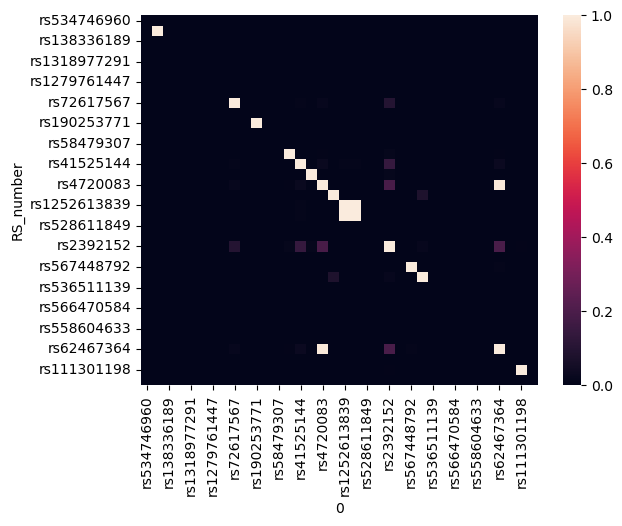

In [27]:
sns.heatmap(ldm)
plt.show()

2. A genomic area can be feed to Genopyc, it will calculate the pairwise LD between all de rsids in that area.

In [28]:
pwld = gp.PairwiseLD(7,32860000,32870000)
pwld

,v1,v2,r2
47,rs1045477,rs752730,0.139342
76,rs1045530,rs752730,0.145177
82,rs1045530,rs1045477,0.995722
102,rs111301198,rs553991139,0.080929
69,rs111304378,rs1045530,0.219998
...,...,...,...
85,rs78635020,rs145587856,0.836219
32,rs78635020,rs6462427,0.074117
12,rs78635020,rs567382666,0.052821
5,rs78635020,rs1045477,0.074436


3. Lastly, as we have already seen, given a specific rsid we can detect all the variants that are in LD above a certain treshold with it. In the following we will retrieve all the variants in LD $\geq$ 0.8 with rs6792369

In [29]:
variants_in_LD = gp.get_variants_in_LD("rs6792369",r2 = 0.8)
variants_in_LD[:10]

['rs6976',
 'rs34140775',
 'rs11719514',
 'rs560977425',
 'rs4687630',
 'rs2286800',
 'rs35211965',
 'rs6790330',
 'rs35315313',
 'rs1961959']

# Retrieve genes associated to GWAS loci exploiting [Open Target L2G pipeline](https://genetics-docs.opentargets.org/our-approach/prioritising-causal-genes-at-gwas-loci-l2g)

The first thing we need to do is to convert variant in the format chr_position_reference_alternative allele, this can be done with the function convert_variants of genopyc

In [30]:
variants_to_study_ot = gp.convert_variants(variants,source='rsid',target = 'variantid')
variants_to_study_ot=list(filter(None,variants_to_study_ot))
variants_to_study_ot

['6_113695931_A_G',
 '13_94300578_T_C',
 '6_32888604_T_C',
 '6_32891971_G_A',
 '8_4427170_G_A',
 '10_31207045_G_A',
 '10_72000418_A_G',
 '6_32892975_G_A',
 '15_67072574_C_A',
 '6_32891935_T_C',
 '6_32887940_G_A',
 '11_103655296_C_T',
 '6_32888705_T_C',
 '16_587212_T_C',
 '6_11943293_T_G',
 '11_103659638_G_T',
 '11_103658904_A_G',
 '10_31226203_T_C',
 '8_4427868_G_C',
 '6_32884870_T_C',
 '6_32889157_T_C',
 '10_31223169_T_C',
 '6_64926030_C_G',
 '3_3638168_C_G',
 '6_32894830_T_A',
 '16_580665_G_A',
 '8_4425096_C_A',
 '16_611335_T_C',
 '10_72018509_C_T',
 '10_68866673_A_G',
 '19_50217817_G_A',
 '8_91547687_A_G',
 '3_5146561_T_C',
 '11_103655026_A_G',
 '6_32889642_T_A',
 '10_71974194_T_C',
 '6_32886920_G_A',
 '10_3112981_C_T',
 '10_72000132_T_C',
 '6_161740587_C_T']

Then we can run the OTG pipeline with the functions OT_L2G. The result is a dataframe with 3 columns with the variant id, the gene and the score assigned by the pipeline. Alternatively by not specifying output = 'all' the top scoring genes in a list will be obtained.

In [32]:
results_OT = gp.OT_L2G(variants_to_study_ot,output='all')
results_OT

,id,gene,score
0,6_113695931_A_G,ENSG00000277443,0.046479
1,6_113695931_A_G,ENSG00000196591,0.026559
2,13_94300578_T_C,ENSG00000080166,0.039839
3,13_94300578_T_C,ENSG00000088451,0.026559
4,13_94300578_T_C,ENSG00000152749,0.026559
...,...,...,...
656,10_72000132_T_C,ENSG00000168209,0.033199
657,10_72000132_T_C,ENSG00000214688,0.033199
658,10_72000132_T_C,ENSG00000107736,0.013280
659,6_161740587_C_T,ENSG00000185345,0.020121
